## PWD Hackathon

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
ocpp = pd.read_csv("data/ocpp.csv")
sessions = pd.read_csv("data/sessions.csv")

In [108]:
# affichons les infos du dataset ocpp
print(ocpp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980945 entries, 0 to 1980944
Data columns (total 7 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   supplier                   object
 1   charger_id                 object
 2   connector_id               int64 
 3   error_code                 object
 4   vendor_error_code          object
 5   total_error_notifications  int64 
 6   error_at                   object
dtypes: int64(2), object(5)
memory usage: 105.8+ MB
None


In [109]:
ocpp.head(20)

,supplier,charger_id,connector_id,error_code,vendor_error_code,total_error_notifications,error_at
0,513B5F6A,4365B1B8,8,InternalError,sessmgr.emvPaymentController,1,2023-09-07
1,513B5F6A,790A884E,3,OtherError,RemoteStart,1,2023-08-10
2,513B5F6A,4365B1B8,8,InternalError,ServiceFail,1,2023-09-07
3,513B5F6A,123468DF,5,EVCommunicationError,COMMUNICATION_ERROR,1,2023-07-24
4,513B5F6A,02D469F0,7,InternalError,ServiceFail,2,2023-06-16
5,513B5F6A,721A1D3E,4,ReaderFailure,sessmgr.hwMonitor.rfid,1,2024-03-28
6,513B5F6A,123468DF,5,EVCommunicationError,COMMUNICATION_ERROR,1,2023-07-24
7,513B5F6A,294028B9,3,InternalError,ServiceFail,2,2024-02-02
8,513B5F6A,235B3C64,4,GroundFailure,GROUND_FAULT,4,2023-06-02
9,513B5F6A,06B4B098,7,OverVoltage,OUTPUT_OVERVOLTAGE,2,2023-12-22


In [110]:
sessions.head(20)

#charger date are the dates

,charge_date,charger_id,connector_id,sessions,failed_sessions
0,2023-01-16,34406128,5,4,0
1,2023-01-23,37A80B4D,3,3,3
2,2023-01-18,AA92D18E,2,2,0
3,2023-01-28,FF15DC0B,3,2,0
4,2023-01-19,06B95C56,2,1,0
5,2023-01-28,11A94CC8,2,2,0
6,2023-01-07,1D3FBF8A,5,3,0
7,2023-01-16,DF5FD46E,1,2,0
8,2023-01-20,6392F834,2,2,1
9,2023-01-06,24DB5287,5,3,0


In [111]:
# nan values
print(ocpp.isnull().sum())
print(sessions.isnull().sum())

print("Nombre de doublons dans Sessions :", sessions.duplicated().sum())
print("Nombre de doublons dans OCPP Logs :", ocpp.duplicated().sum())

supplier                        75
charger_id                       0
connector_id                     0
error_code                       0
vendor_error_code            76382
total_error_notifications        0
error_at                         0
dtype: int64
charge_date        0
charger_id         0
connector_id       0
sessions           0
failed_sessions    0
dtype: int64
Nombre de doublons dans Sessions : 0
Nombre de doublons dans OCPP Logs : 1953084


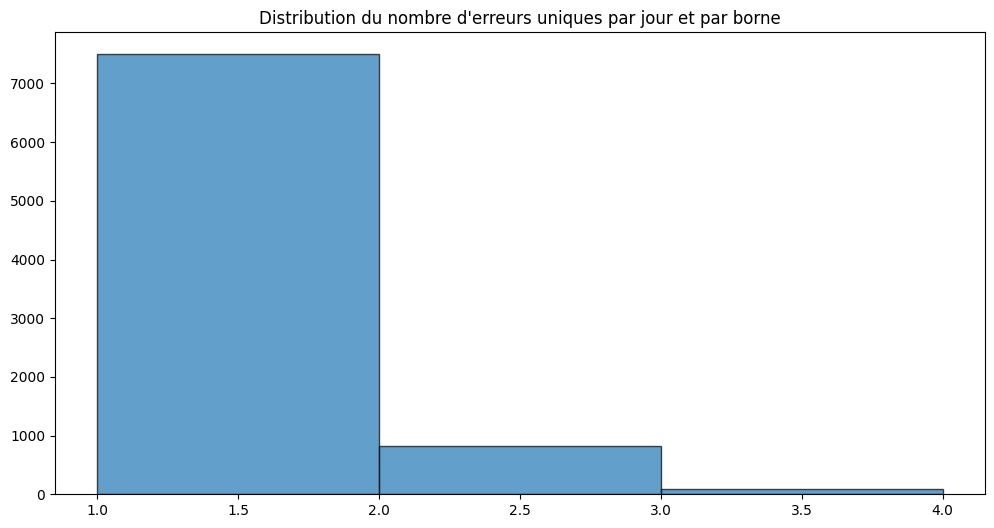

In [112]:
# Compter le nombre d'erreurs uniques (différentes) par jour et par borne
error_counts = ocpp.groupby(["charger_id", "error_at"])["error_code"].nunique()

#Tracer l'histogramme des erreurs
plt.figure(figsize=(12, 6))
plt.hist(error_counts, bins=range(1, error_counts.max() + 1), edgecolor="black", alpha=0.7)
plt.title("Distribution du nombre d'erreurs uniques par jour et par borne")
plt.show()

In [113]:
sessions["charge_date"] = pd.to_datetime(sessions["charge_date"])
ocpp["error_at"] = pd.to_datetime(ocpp["error_at"])

In [114]:
# Vérifier si error_code contient des valeurs
print("Aperçu des erreurs dans OCPP Logs :")
print(ocpp[["charger_id", "error_at", "error_code"]].head(20))

# Vérifier combien d'erreurs sont présentes
print("Nombre d'erreurs différentes :")
print(ocpp["error_code"].value_counts())

# Vérifier la plage des dates des erreurs vs sessions
print("Plage des dates dans sessions :", sessions["charge_date"].min(), "->", sessions["charge_date"].max())
print("Plage des dates dans ocpp_logs :", ocpp["error_at"].min(), "->", ocpp["error_at"].max())


Aperçu des erreurs dans OCPP Logs :
   charger_id   error_at            error_code
0    4365B1B8 2023-09-07         InternalError
1    790A884E 2023-08-10            OtherError
2    4365B1B8 2023-09-07         InternalError
3    123468DF 2023-07-24  EVCommunicationError
4    02D469F0 2023-06-16         InternalError
5    721A1D3E 2024-03-28         ReaderFailure
6    123468DF 2023-07-24  EVCommunicationError
7    294028B9 2024-02-02         InternalError
8    235B3C64 2023-06-02         GroundFailure
9    06B4B098 2023-12-22           OverVoltage
10   FD53232C 2023-07-26         GroundFailure
11   F4F92CA4 2024-02-20            OtherError
12   351D7ACA 2024-01-20         InternalError
13   0DAF7992 2023-09-05            OtherError
14   62613275 2023-06-14         InternalError
15   F2B7CCB6 2024-02-06         GroundFailure
16   9E39312F 2023-07-14         ReaderFailure
17   28E8EBC5 2023-12-21           OverVoltage
18   D5764723 2023-10-18            OtherError
19   FCC3E0F2 2024-03-18

In [115]:
# Regrouper les erreurs par chargeur et jour (une ligne par chargeur + jour)
error_counts = ocpp.groupby(["charger_id", "error_at"])["error_code"].value_counts().unstack(fill_value=0).reset_index()

# Vérifier l'output avant fusion
print("Aperçu du comptage des erreurs :")
error_counts.head(10)

Aperçu du comptage des erreurs :


error_code,charger_id,error_at,ConnectorLockFailure,EVCommunicationError,GroundFailure,HighTemperature,InternalError,OtherError,OverCurrentFailure,OverVoltage,PowerMeterFailure,PowerSwitchFailure,ReaderFailure,UnderVoltage
0,00284A5C,2023-05-28,0,0,0,0,0,294,0,0,0,0,0,0
1,00284A5C,2023-06-06,0,0,0,0,0,3,0,0,0,0,0,0
2,00284A5C,2023-08-24,0,10,0,0,0,0,0,0,0,0,0,0
3,00284A5C,2023-10-12,0,0,0,0,0,1,0,0,0,0,0,0
4,00284A5C,2023-11-24,0,1,0,0,0,4,0,0,0,0,0,0
5,00284A5C,2023-11-28,0,0,0,0,0,0,0,0,1,0,0,0
6,00284A5C,2023-12-06,0,0,0,0,0,44,0,0,0,0,0,0
7,00284A5C,2023-12-15,0,0,0,0,0,2,0,0,0,0,0,0
8,00284A5C,2024-02-11,0,0,0,0,0,1,0,0,0,0,0,0
9,00284A5C,2024-03-25,0,0,0,0,0,56,0,0,0,0,0,0


In [116]:
print(sessions.dtypes)
print(error_counts.dtypes)

charge_date        datetime64[ns]
charger_id                 object
connector_id                int64
sessions                    int64
failed_sessions             int64
dtype: object
error_code
charger_id                      object
error_at                datetime64[ns]
ConnectorLockFailure             int64
EVCommunicationError             int64
GroundFailure                    int64
HighTemperature                  int64
InternalError                    int64
OtherError                       int64
OverCurrentFailure               int64
OverVoltage                      int64
PowerMeterFailure                int64
PowerSwitchFailure               int64
ReaderFailure                    int64
UnderVoltage                     int64
dtype: object


In [117]:
# Fusionner sessions et erreurs agrégées
merged_df = sessions.merge(error_counts, left_on=["charger_id", "charge_date"], right_on=["charger_id", "error_at"], how="left")

# Supprimer la colonne "error_at" (doublon de charge_date)
merged_df = merged_df.drop(columns=["error_at"])

# Remplacer les NaN par 0 (pas d'erreur = 0)
merged_df = merged_df.fillna(0)

# Vérifier si les erreurs apparaissent bien après fusion
merged_df.head(30)

,charge_date,charger_id,connector_id,sessions,failed_sessions,ConnectorLockFailure,EVCommunicationError,GroundFailure,HighTemperature,InternalError,OtherError,OverCurrentFailure,OverVoltage,PowerMeterFailure,PowerSwitchFailure,ReaderFailure,UnderVoltage
0,2023-01-16,34406128,5,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-23,37A80B4D,3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-18,AA92D18E,2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-28,FF15DC0B,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-19,06B95C56,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2023-01-28,11A94CC8,2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2023-01-07,1D3FBF8A,5,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2023-01-16,DF5FD46E,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2023-01-20,6392F834,2,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2023-01-06,24DB5287,5,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# Vérifier combien de lignes ont au moins une erreur non nulle
error_columns = error_counts.columns[2:]  # Exclure charger_id et error_at
merged_df["total_errors"] = merged_df[error_columns].sum(axis=1)

print("Nombre de lignes avec au moins une erreur :", (merged_df["total_errors"] > 0).sum())
print("Nombre de lignes SANS erreur :", (merged_df["total_errors"] == 0).sum())

Nombre de lignes avec au moins une erreur : 19072
Nombre de lignes SANS erreur : 423572


In [119]:
# Voir si on a bien des sessions et erreurs aux mêmes dates
common_dates = set(sessions["charge_date"]).intersection(set(error_counts["error_at"]))

print("Nombre de dates en commun entre sessions et erreurs :", len(common_dates))
print("Exemples de dates en commun :", list(common_dates)[:10])

Nombre de dates en commun entre sessions et erreurs : 385
Exemples de dates en commun : [Timestamp('2023-09-30 00:00:00'), Timestamp('2023-06-08 00:00:00'), Timestamp('2023-11-07 00:00:00'), Timestamp('2023-07-25 00:00:00'), Timestamp('2024-02-21 00:00:00'), Timestamp('2024-01-02 00:00:00'), Timestamp('2024-01-06 00:00:00'), Timestamp('2024-04-02 00:00:00'), Timestamp('2023-07-15 00:00:00'), Timestamp('2024-01-23 00:00:00')]


In [120]:
# Aperçu de sessions
print("🟢 Aperçu de sessions :")
print(sessions.head(10))

# Aperçu de ocpp_logs (avant agrégation)
print("\n🔵 Aperçu de ocpp_logs :")
print(ocpp.head(10))

# Vérification des types
print("\n🟡 Types des colonnes dans sessions :")
print(sessions.dtypes)

print("\n🟠 Types des colonnes dans ocpp_logs :")
print(ocpp.dtypes)

# Vérifier si on a des valeurs bizarres
print("\n🟣 Valeurs uniques de charge_date dans sessions :")
print(sessions["charge_date"].dropna().unique()[:10])

print("\n🔴 Valeurs uniques de error_at dans ocpp_logs :")
print(ocpp["error_at"].dropna().unique()[:10])

🟢 Aperçu de sessions :
  charge_date charger_id  connector_id  sessions  failed_sessions
0  2023-01-16   34406128             5         4                0
1  2023-01-23   37A80B4D             3         3                3
2  2023-01-18   AA92D18E             2         2                0
3  2023-01-28   FF15DC0B             3         2                0
4  2023-01-19   06B95C56             2         1                0
5  2023-01-28   11A94CC8             2         2                0
6  2023-01-07   1D3FBF8A             5         3                0
7  2023-01-16   DF5FD46E             1         2                0
8  2023-01-20   6392F834             2         2                1
9  2023-01-06   24DB5287             5         3                0

🔵 Aperçu de ocpp_logs :
   supplier charger_id  connector_id            error_code  \
0  513B5F6A   4365B1B8             8         InternalError   
1  513B5F6A   790A884E             3            OtherError   
2  513B5F6A   4365B1B8             8    

In [121]:
print("📅 Période couverte par sessions :", sessions["charge_date"].min(), "->", sessions["charge_date"].max())
print("📅 Période couverte par ocpp_logs :", ocpp["error_at"].min(), "->", ocpp["error_at"].max())

# Vérifier le nombre de sessions et erreurs par année
sessions["year"] = sessions["charge_date"].dt.year
ocpp["year"] = ocpp["error_at"].dt.year

print("\nNombre de sessions par année :")
print(sessions["year"].value_counts().sort_index())

print("\nNombre d'erreurs par année :")
print(ocpp["year"].value_counts().sort_index())


📅 Période couverte par sessions : 2022-07-06 00:00:00 -> 2024-06-07 00:00:00
📅 Période couverte par ocpp_logs : 2023-05-19 00:00:00 -> 2024-06-06 00:00:00

Nombre de sessions par année :
year
2022     44021
2023    231297
2024    167326
Name: count, dtype: int64

Nombre d'erreurs par année :
year
2023    1439450
2024     541495
Name: count, dtype: int64


In [122]:
# Ne garder que les sessions après 2023 (pour matcher ocpp_logs)
sessions = sessions[sessions["charge_date"] >= "2023-05-19"]

# Vérifier si les dates se chevauchent mieux après ce filtre
print("📅 Nouvelle période couverte par sessions :", sessions["charge_date"].min(), "->", sessions["charge_date"].max())


📅 Nouvelle période couverte par sessions : 2023-05-19 00:00:00 -> 2024-06-07 00:00:00


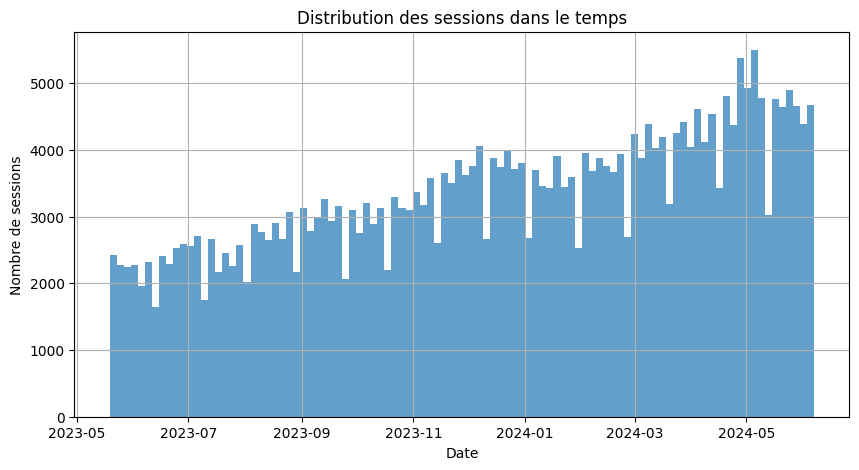

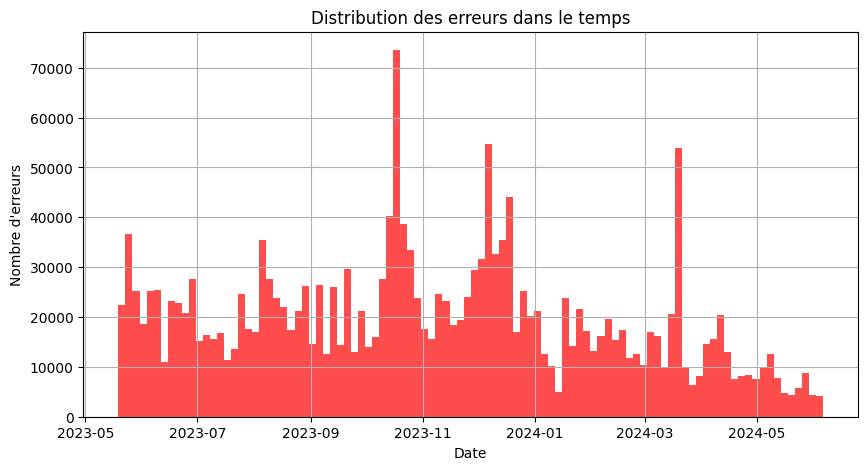

In [123]:
import matplotlib.pyplot as plt

# Histogramme du nombre de sessions par jour
plt.figure(figsize=(10, 5))
sessions["charge_date"].hist(bins=100, alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Nombre de sessions")
plt.title("Distribution des sessions dans le temps")
plt.show()

# Histogramme du nombre d'erreurs par jour
plt.figure(figsize=(10, 5))
ocpp["error_at"].hist(bins=100, alpha=0.7, color="red")
plt.xlabel("Date")
plt.ylabel("Nombre d'erreurs")
plt.title("Distribution des erreurs dans le temps")
plt.show()


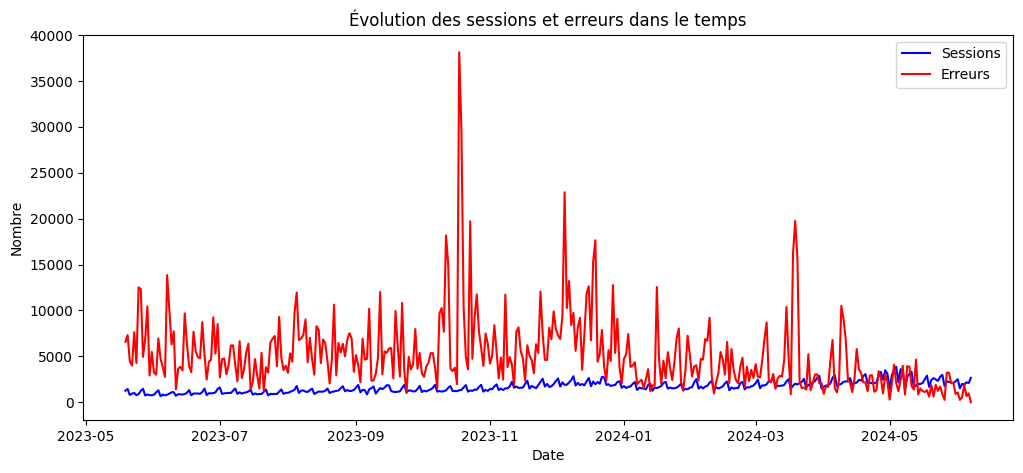

In [124]:
# Regrouper sessions et erreurs par date pour voir la tendance
sessions_daily = sessions.groupby("charge_date")["sessions"].sum().reset_index()
errors_daily = ocpp.groupby("error_at")["error_code"].count().reset_index()

# Fusionner pour voir l'évolution sessions vs erreurs
daily_trends = sessions_daily.merge(errors_daily, left_on="charge_date", right_on="error_at", how="outer").fillna(0)
daily_trends.rename(columns={"sessions": "total_sessions", "error_code": "total_errors"}, inplace=True)

plt.figure(figsize=(12, 5))
plt.plot(daily_trends["charge_date"], daily_trends["total_sessions"], label="Sessions", color="blue")
plt.plot(daily_trends["charge_date"], daily_trends["total_errors"], label="Erreurs", color="red")
plt.xlabel("Date")
plt.ylabel("Nombre")
plt.legend()
plt.title("Évolution des sessions et erreurs dans le temps")
plt.show()


In [125]:
# Supprimer les doublons : on garde seulement 1 erreur unique par chargeur et jour
ocpp_logs_unique = ocpp.drop_duplicates(subset=["charger_id", "error_at", "error_code"])
print("Nombre total d'erreurs AVANT suppression des doublons :", len(ocpp))
print("Nombre total d'erreurs APRÈS suppression des doublons :", len(ocpp_logs_unique))

Nombre total d'erreurs AVANT suppression des doublons : 1980945
Nombre total d'erreurs APRÈS suppression des doublons : 9428


In [126]:
error_counts_clean = ocpp_logs_unique.groupby(["charger_id", "error_at"])["error_code"].nunique().reset_index()
error_counts_clean.rename(columns={"error_code": "unique_error_count"}, inplace=True)
error_counts_clean.head()

,charger_id,error_at,unique_error_count
0,00284A5C,2023-05-28,1
1,00284A5C,2023-06-06,1
2,00284A5C,2023-08-24,1
3,00284A5C,2023-10-12,1
4,00284A5C,2023-11-24,2


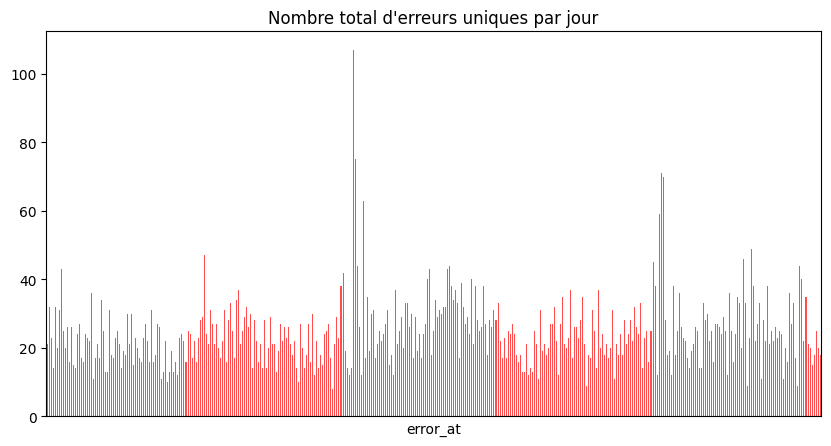

In [127]:
plt.figure(figsize=(10, 5))
error_counts_clean.groupby("error_at")["unique_error_count"].sum().plot(kind="bar", color="red", alpha=0.7)
#supprimer les graduations sur l'axe x
plt.title("Nombre total d'erreurs uniques par jour")
plt.xticks([])
plt.show()

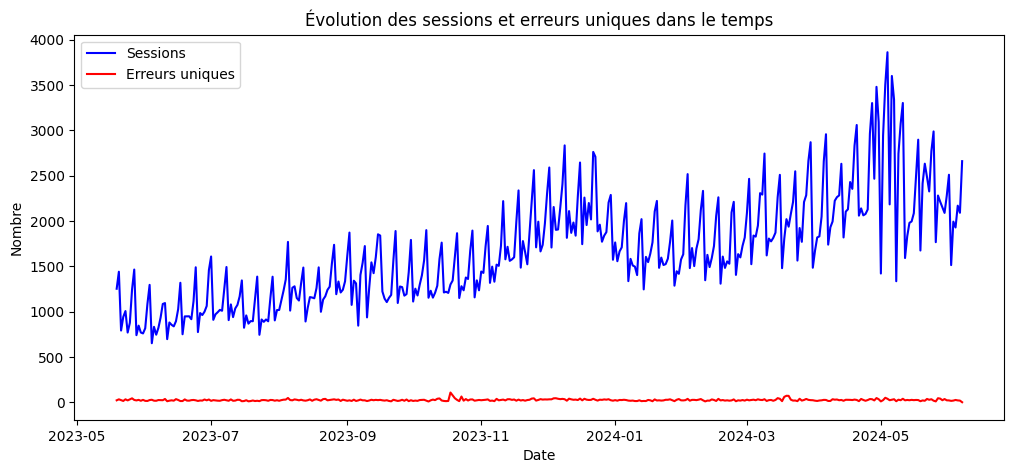

In [128]:
# Fusionner avec les sessions
sessions_daily_clean = sessions.groupby("charge_date")["sessions"].sum().reset_index()
errors_daily_clean = error_counts_clean.groupby("error_at")["unique_error_count"].sum().reset_index()

# Fusionner les deux
daily_trends_clean = sessions_daily_clean.merge(errors_daily_clean, left_on="charge_date", right_on="error_at", how="outer").fillna(0)

# Renommer les colonnes
daily_trends_clean.rename(columns={"sessions": "total_sessions", "unique_error_count": "total_errors"}, inplace=True)

# 🔍 Courbe propre sessions vs erreurs
plt.figure(figsize=(12, 5))
plt.plot(daily_trends_clean["charge_date"], daily_trends_clean["total_sessions"], label="Sessions", color="blue")
plt.plot(daily_trends_clean["charge_date"], daily_trends_clean["total_errors"], label="Erreurs uniques", color="red")
plt.xlabel("Date")
plt.ylabel("Nombre")
plt.legend()
plt.title("Évolution des sessions et erreurs uniques dans le temps")
plt.show()

In [142]:
sessions = sessions.sort_values(by=["charger_id", "charge_date"]).reset_index(drop=True)
error_counts_clean = error_counts_clean.sort_values(by=["charger_id", "error_at"]).reset_index(drop=True)

# sessions sur les 7 DERNIERS JOURS HORS jour même (shift de 1)
sessions["sessions_7d"] = (
    sessions.groupby("charger_id")["sessions"]
    .apply(lambda x: x.shift(1).rolling(7, min_periods=1).sum())
    .reset_index(level=0, drop=True)
)

# erreurs sur les 7 DERNIERS JOURS HORS jour même (shift de 1)
error_counts_clean["errors_7d"] = (
    error_counts_clean.groupby("charger_id")["unique_error_count"]
    .apply(lambda x: x.shift(1).rolling(7, min_periods=1).sum())
    .reset_index(level=0, drop=True)
)

# jours consécutifs sans sessions (shift de 1 aussi, on ne veut pas compter aujourd'hui)
sessions["no_session_days"] = (
    sessions.groupby("charger_id")["sessions"]
    .apply(lambda x: x.shift(1).eq(0).groupby((x.shift(1) != 0).cumsum()).cumsum())
    .reset_index(level=0, drop=True)
)

# ratio d'échec moyen sur 7 jours HORS jour même
sessions["failure_rate_7d"] = (
    sessions.groupby("charger_id")["failed_sessions"]
    .apply(lambda x: x.shift(1).rolling(7, min_periods=1).mean())
    .reset_index(level=0, drop=True)
)

# remplacer les éventuels NaN du début par 0
sessions.fillna(0, inplace=True)
error_counts_clean.fillna(0, inplace=True)


In [143]:
print(sessions[["charger_id", "charge_date", "sessions", "sessions_7d", "no_session_days", "failure_rate_7d"]].head(10))

error_counts_clean[["charger_id", "error_at", "unique_error_count", "errors_7d"]].head(10)

  charger_id charge_date  sessions  sessions_7d  no_session_days  \
0   00284A5C  2023-05-19         1          0.0                0   
1   00284A5C  2023-05-26         1          1.0                0   
2   00284A5C  2023-06-06         1          2.0                0   
3   00284A5C  2023-06-06         1          3.0                0   
4   00284A5C  2023-06-16         1          4.0                0   
5   00284A5C  2023-06-21         1          5.0                0   
6   00284A5C  2023-06-25         1          6.0                0   
7   00284A5C  2023-06-28         1          7.0                0   
8   00284A5C  2023-07-10         1          7.0                0   
9   00284A5C  2023-07-14         1          7.0                0   

   failure_rate_7d  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
5              0.0  
6              0.0  
7              0.0  
8              0.0  
9              0.0  


,charger_id,error_at,unique_error_count,errors_7d
0,00284A5C,2023-05-28,1,0.0
1,00284A5C,2023-06-06,1,1.0
2,00284A5C,2023-08-24,1,2.0
3,00284A5C,2023-10-12,1,3.0
4,00284A5C,2023-11-24,2,4.0
5,00284A5C,2023-11-28,1,6.0
6,00284A5C,2023-12-06,1,7.0
7,00284A5C,2023-12-15,1,8.0
8,00284A5C,2024-02-11,1,8.0
9,00284A5C,2024-03-25,1,8.0


In [144]:
# Fusion des erreurs avec les sessions
merged_df = sessions.merge(
    error_counts_clean[["charger_id", "error_at", "errors_7d"]],
    left_on=["charger_id", "charge_date"],
    right_on=["charger_id", "error_at"],
    how="left"
)

# Suppression de la colonne "error_at" qui est un doublon de charge_date
merged_df = merged_df.drop(columns=["error_at"])

# Remplacer les valeurs NaN des erreurs par 0 (s'il n'y a pas eu d'erreurs sur les derniers jours)
merged_df["errors_7d"] = merged_df["errors_7d"].fillna(0)


print("\nValeurs NaN après fusion :")
print(merged_df.isnull().sum())

merged_df.head(50)



Valeurs NaN après fusion :
charge_date        0
charger_id         0
connector_id       0
sessions           0
failed_sessions    0
year               0
sessions_7d        0
no_session_days    0
failure_rate_7d    0
errors_7d          0
dtype: int64


,charge_date,charger_id,connector_id,sessions,failed_sessions,year,sessions_7d,no_session_days,failure_rate_7d,errors_7d
0,2023-05-19,00284A5C,2,1,0,2023,0.0,0,0.000000,0.0
1,2023-05-26,00284A5C,3,1,0,2023,1.0,0,0.000000,0.0
2,2023-06-06,00284A5C,3,1,0,2023,2.0,0,0.000000,1.0
3,2023-06-06,00284A5C,2,1,0,2023,3.0,0,0.000000,1.0
4,2023-06-16,00284A5C,3,1,0,2023,4.0,0,0.000000,0.0
5,2023-06-21,00284A5C,3,1,0,2023,5.0,0,0.000000,0.0
6,2023-06-25,00284A5C,2,1,0,2023,6.0,0,0.000000,0.0
7,2023-06-28,00284A5C,2,1,0,2023,7.0,0,0.000000,0.0
8,2023-07-10,00284A5C,1,1,0,2023,7.0,0,0.000000,0.0
9,2023-07-14,00284A5C,3,1,0,2023,7.0,0,0.000000,0.0


Valeurs NaN après création de la target :
charge_date            0
charger_id             0
connector_id           0
sessions               0
failed_sessions        0
year                   0
sessions_7d            0
no_session_days        0
failure_rate_7d        0
errors_7d              0
failure_probability    0
dtype: int64


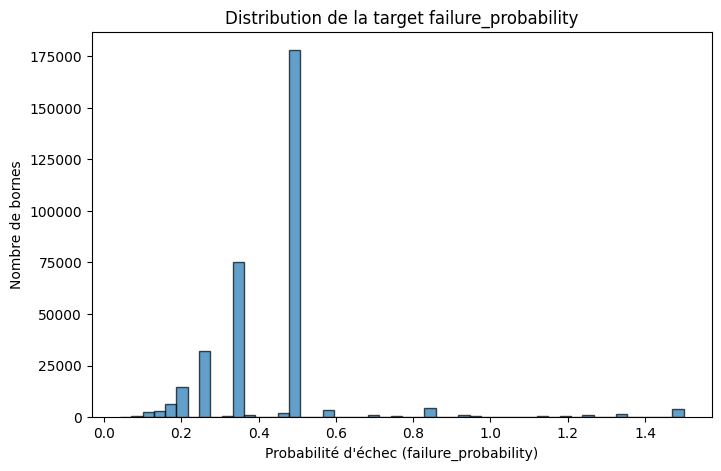

In [145]:
# Création de la target : probabilité d'échec
merged_df["failure_probability"] = merged_df["failed_sessions"] / merged_df["sessions"] + 1/(1+merged_df["sessions"])
merged_df["failure_probability"] = merged_df["failure_probability"].fillna(0)

# Vérification des valeurs NaN après création de la target
print("Valeurs NaN après création de la target :")
print(merged_df.isnull().sum())

# Histogramme de la distribution de la target
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(merged_df["failure_probability"], bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Probabilité d'échec (failure_probability)")
plt.ylabel("Nombre de bornes")
plt.title("Distribution de la target failure_probability")
plt.show()

Nombre de lignes avec failure_probability == 0 : 0 (0.00%)
Nombre de lignes avec failure_probability > 0 : 335706 (100.00%)


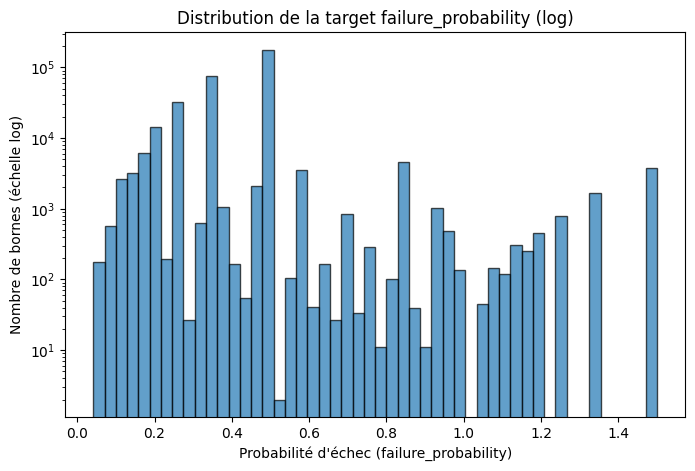

In [146]:
zero_failures = (merged_df["failure_probability"] == 0).sum()
nonzero_failures = (merged_df["failure_probability"] > 0).sum()
total = len(merged_df)

print(f"Nombre de lignes avec failure_probability == 0 : {zero_failures} ({zero_failures/total:.2%})")
print(f"Nombre de lignes avec failure_probability > 0 : {nonzero_failures} ({nonzero_failures/total:.2%})")

plt.figure(figsize=(8,5))
plt.hist(merged_df["failure_probability"], bins=50, edgecolor="black", alpha=0.7, log=True)
plt.xlabel("Probabilité d'échec (failure_probability)")
plt.ylabel("Nombre de bornes (échelle log)")
plt.title("Distribution de la target failure_probability (log)")
plt.show()

In [147]:
df_incohérent = merged_df[(merged_df["errors_7d"] > 0) & (merged_df["failure_probability"] == 0)]
print(f"Incohérences détectées : {len(df_incohérent)} lignes")

Incohérences détectées : 0 lignes


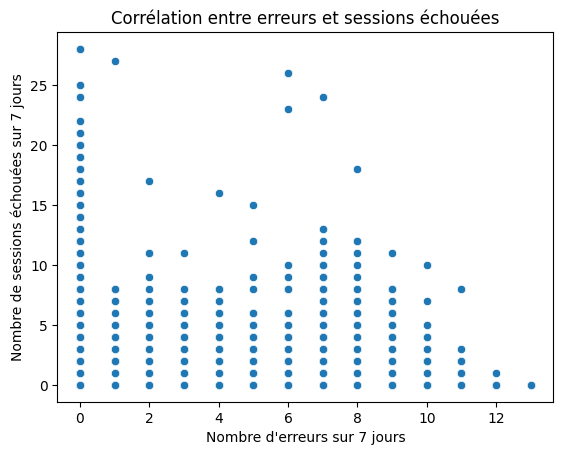

In [148]:
import seaborn as sns

sns.scatterplot(data=merged_df, x="errors_7d", y="failed_sessions")
plt.xlabel("Nombre d'erreurs sur 7 jours")
plt.ylabel("Nombre de sessions échouées sur 7 jours")
plt.title("Corrélation entre erreurs et sessions échouées")
plt.show()

In [149]:
merged_df[["charge_date", "charger_id", "sessions", "failed_sessions", "errors_7d"]].sort_values(by=["charger_id", "charge_date"]).head(20)

,charge_date,charger_id,sessions,failed_sessions,errors_7d
0,2023-05-19,00284A5C,1,0,0.0
1,2023-05-26,00284A5C,1,0,0.0
2,2023-06-06,00284A5C,1,0,1.0
3,2023-06-06,00284A5C,1,0,1.0
4,2023-06-16,00284A5C,1,0,0.0
5,2023-06-21,00284A5C,1,0,0.0
6,2023-06-25,00284A5C,1,0,0.0
7,2023-06-28,00284A5C,1,0,0.0
8,2023-07-10,00284A5C,1,0,0.0
9,2023-07-14,00284A5C,1,0,0.0


In [150]:
# Afficher quelques erreurs et sessions d'un même chargeur_id
charger_sample = "00284A5C"

print("Sessions :")
display(sessions[sessions["charger_id"] == charger_sample].sort_values("charge_date"))

print("Erreurs :")
display(error_counts_clean[error_counts_clean["charger_id"] == charger_sample].sort_values("error_at"))

Sessions :


,charge_date,charger_id,connector_id,sessions,failed_sessions,year,sessions_7d,no_session_days,failure_rate_7d
0,2023-05-19,00284A5C,2,1,0,2023,0.0,0,0.000000
1,2023-05-26,00284A5C,3,1,0,2023,1.0,0,0.000000
2,2023-06-06,00284A5C,3,1,0,2023,2.0,0,0.000000
3,2023-06-06,00284A5C,2,1,0,2023,3.0,0,0.000000
4,2023-06-16,00284A5C,3,1,0,2023,4.0,0,0.000000
...,...,...,...,...,...,...,...,...,...
192,2024-05-12,00284A5C,2,2,1,2024,11.0,0,0.142857
193,2024-05-16,00284A5C,3,2,0,2024,10.0,0,0.142857
194,2024-05-25,00284A5C,3,2,0,2024,10.0,0,0.142857
195,2024-05-26,00284A5C,3,2,0,2024,11.0,0,0.142857


Erreurs :


,charger_id,error_at,unique_error_count,errors_7d
0,00284A5C,2023-05-28,1,0.0
1,00284A5C,2023-06-06,1,1.0
2,00284A5C,2023-08-24,1,2.0
3,00284A5C,2023-10-12,1,3.0
4,00284A5C,2023-11-24,2,4.0
5,00284A5C,2023-11-28,1,6.0
6,00284A5C,2023-12-06,1,7.0
7,00284A5C,2023-12-15,1,8.0
8,00284A5C,2024-02-11,1,8.0
9,00284A5C,2024-03-25,1,8.0


In [151]:
# Sélection des cas où il y a des erreurs sur 7 jours mais 0 sessions échouées
incoherent_cases = merged_df[(merged_df["errors_7d"] > 0) & (merged_df["failed_sessions"] == 0)]
display(incoherent_cases)

,charge_date,charger_id,connector_id,sessions,failed_sessions,year,sessions_7d,no_session_days,failure_rate_7d,errors_7d,failure_probability
2,2023-06-06,00284A5C,3,1,0,2023,2.0,0,0.000000,1.0,0.500000
3,2023-06-06,00284A5C,2,1,0,2023,3.0,0,0.000000,1.0,0.500000
26,2023-08-24,00284A5C,3,1,0,2023,10.0,0,0.000000,2.0,0.500000
75,2023-11-24,00284A5C,3,2,0,2023,8.0,0,0.000000,4.0,0.333333
76,2023-11-24,00284A5C,2,1,0,2023,9.0,0,0.000000,4.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
335427,2024-01-02,FF9941D5,2,3,0,2024,9.0,0,0.000000,7.0,0.250000
335685,2024-05-28,FF9941D5,2,1,0,2024,18.0,0,0.285714,7.0,0.500000
335686,2024-05-28,FF9941D5,3,3,0,2024,15.0,0,0.285714,7.0,0.250000
335697,2024-06-03,FF9941D5,3,1,0,2024,17.0,0,0.000000,7.0,0.500000


In [152]:
# Comptage des erreurs par charger_id pour voir si certaines n'ont pas de sessions associées
chargers_with_errors = error_counts_clean["charger_id"].unique()
chargers_with_sessions = sessions["charger_id"].unique()

# Borne avec erreurs mais sans sessions
chargers_with_only_errors = set(chargers_with_errors) - set(chargers_with_sessions)
print("Nombre de bornes avec erreurs mais sans sessions :", len(chargers_with_only_errors))

Nombre de bornes avec erreurs mais sans sessions : 4


Incohérences détectées : 15067 lignes


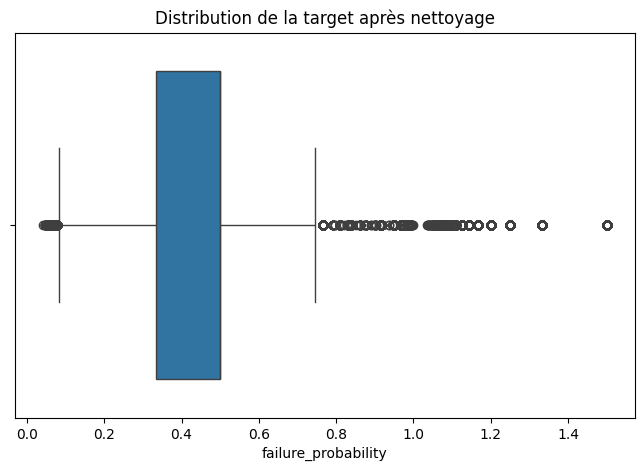

Dataset clean exporté : data/dataset_clean.csv
<class 'pandas.core.frame.DataFrame'>
Index: 320639 entries, 0 to 335705
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   charge_date          320639 non-null  datetime64[ns]
 1   charger_id           320639 non-null  object        
 2   connector_id         320639 non-null  int64         
 3   sessions             320639 non-null  int64         
 4   failed_sessions      320639 non-null  int64         
 5   year                 320639 non-null  int32         
 6   sessions_7d          320639 non-null  float64       
 7   no_session_days      320639 non-null  int64         
 8   failure_rate_7d      320639 non-null  float64       
 9   errors_7d            320639 non-null  float64       
 10  failure_probability  320639 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(1)
memory usage: 28.1+ MB
N

In [153]:
# Vérification des incohérences : erreurs détectées mais aucune session échouée
merged_df["incoherent_flag"] = (merged_df["errors_7d"] > 0) & (merged_df["failed_sessions"] == 0)

# Nombre d'incohérences détectées
print(f"Incohérences détectées : {merged_df['incoherent_flag'].sum()} lignes")

# Option 1 : Supprimer ces incohérences si elles ne font pas sens
final_df = merged_df[~merged_df["incoherent_flag"]].drop(columns=["incoherent_flag"])

# Option 2 : Remplacer les erreurs_7d à 0 si aucune session échouée
# merged_df.loc[merged_df["incoherent_flag"], "errors_7d"] = 0
# merged_df = merged_df.drop(columns=["incoherent_flag"])

# Vérification des valeurs aberrantes sur failure_probability
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x="failure_probability")
plt.title("Distribution de la target après nettoyage")
plt.show()

# # Suppression des colonnes non pertinentes pour l'entraînement
# final_df = merged_df.drop(columns=["charge_date", "charger_id"])

# Exporter en CSV
final_df.to_csv("data/dataset_clean.csv", index=False)
print("Dataset clean exporté : data/dataset_clean.csv")

# Vérification finale
print(final_df.info())
print(final_df.describe())